Afin d'essayer de comprendre la notion de R2, ou pour etre sur de ma comprehension actuelle, j'ai decide d'etudier un echantillon de points qui suivrait certes une croissance lineaire, mais dont la position oscillerait autour de cette droite de regression.

J'ai utilise drawdata.xyz, pour ce faire, ce qui donne ca :

![drawdata de mon scatter](https://maximorose.eu/Ressources/drawingdataxyz.png)

Le .csv est disponible dans le dossier "data".

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('./data/data.csv', sep=",")
df.drop(columns=['z'], inplace=True)
df.head(2)

x           y
0  74.623277  161.270657
1 -19.044893  152.653260

In [9]:
X = np.array(df['x'])
X = X.reshape((X.shape[0], 1))
y = df['y']
print(f"X a pour forme : {X.shape}")
print(f"y a pour forme : {y.shape}")
lr = LinearRegression()
lr.fit(X, y)
print(f"Notre R2 est de : {lr.score(X, y).round(2)}")
print(f"Notre equation de la forme : y = {lr.coef_[0].round(2)}x + {int(lr.intercept_)}")
erreur_moyenne = np.sqrt(mean_squared_error(lr.predict(X), y))
print(f"Erreur moyenne = {erreur_moyenne.round(2)}")
print(f"Erreur moyenne par rapport a la moyenne de y = {(erreur_moyenne/y.std()).round(1)}")


X a pour forme : (359, 1)
y a pour forme : (359,)
Notre R2 est de : 0.7
Notre equation de la forme : y = 0.66x + 145
Erreur moyenne = 52.7
Erreur moyenne par rapport a la moyenne de y = 0.5


__Notre regression lineaire simple explique 70% de la variabilite du modele.__

Notre erreur moyenne est 50% plus petite que l'ecart-type.

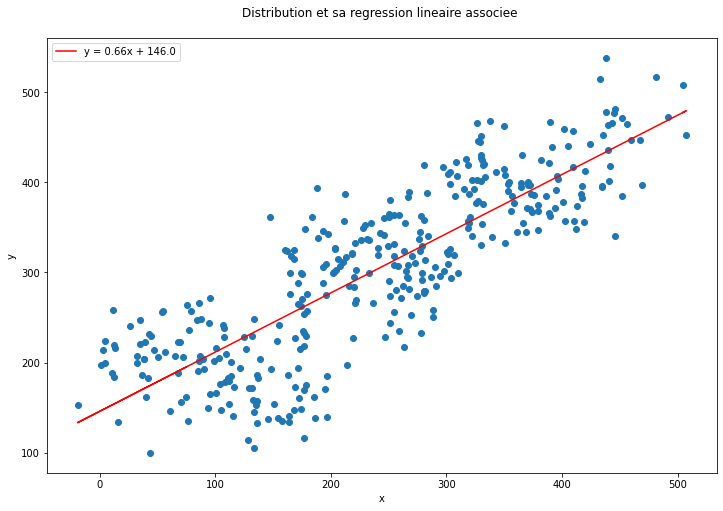

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(df['x'], df['y'])
plt.plot(X, lr.predict(X), c= 'r', label = f"y = {lr.coef_[0].round(2)}x + {lr.intercept_.round(0)}")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Distribution et sa regression lineaire associee \n")
plt.show()

Si la croissance de notre variable X explique 70% de la croissance de notre variable y, notre modele risque de faire une erreur correspondant de 20% la valeur moyenne de y. Il n'est pas adapte a predire mais nous explique deja 70% de la variation de nos donnees.

Si X est mon budget communication et y, mon nombre de nouveaux client. Alors si j'augmente mon budget com' de 100$, je gagnerai 66 nouveaux clients. Helas, 30% de notre variabilite ne peut etre expliquee par ces donnees et ce modele, ainsi le point reel sera en moyenne distant de 53 unites du gain reel. Pour un investissement de 1000$ notre erreur moyenne ne represente plus que 8% de notre accroissement predit et pourrait assurer un reel gain de clientelle. 